In [107]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import openpyxl

In [108]:
dates = pd.read_excel('EventStudies_11_march-3 (2).xlsx', sheet_name='Results')
dates = dates.dropna(subset='Acquiror ticker symbol')
print(dates.shape[0])
# dates = dates.drop_duplicates(subset='Acquiror name', keep='first')

1469


In [109]:
dates = dates[(dates.groupby('Acquiror ticker symbol')['Announced date'].diff().fillna(201)>200)]
dates = dates.replace('n.a.', None, regex=True).dropna(subset='Pre-deal acquiror market capitalisation\nEUR')

In [110]:
prices = pd.read_csv('HistoricalPricesАвтоматическиВосстановлено.csv', delimiter=';')

/var/folders/g5/mzy3t8rn7pndp8tlt6b698qc0000gn/T/ipykernel_52825/2854334214.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,2

In [111]:
prices_final = prices.drop(2).drop(1).dropna(axis=1, how='all')
prices_final.columns = prices_final.iloc[0,:].values
prices_final =prices_final.drop(0)
prices_final = prices_final.loc[:, ~prices_final.columns.duplicated()].replace(',','.', regex=True)

In [112]:
prices_final

,Acquiror ticker symbol,TRN,TRN_copy,BBY,BBY_copy,SOI,SOI_copy,600699,600699_copy,JSG,...,REACH,REACH_copy,OLYMP,OLYMP_copy,ADEN,ADEN_copy,DNZYO,DNZYO_copy,^SXXL,^SXXL_copy
3,NaN,8.545,02.01.2009,29.02,02.01.2009,11.55,12.05.2017,5.82143,16.12.2011,0.0963,...,0.705,15.08.2014,1.2,02.01.2009,1.1,02.01.2009,NaN,NaN,208,01.01.2009
4,NaN,8.6,05.01.2009,30,05.01.2009,11.75,15.05.2017,5.85,19.12.2011,0.1075,...,0.695,18.08.2014,1.2,05.01.2009,1.06,05.01.2009,NaN,NaN,212.77,02.01.2009
5,NaN,8.95,06.01.2009,31.25,06.01.2009,12.03,16.05.2017,5.82143,20.12.2011,0.105,...,0.695,19.08.2014,1.2,07.01.2009,1.04,06.01.2009,NaN,NaN,212.49,05.01.2009
6,NaN,8.34,07.01.2009,29.55,07.01.2009,12.04,17.05.2017,5.72143,21.12.2011,0.1025,...,0.68,20.08.2014,1.1,08.01.2009,1.01,07.01.2009,NaN,NaN,212.76,06.01.2009
7,NaN,8.49,08.01.2009,29.65,08.01.2009,12,18.05.2017,5.58571,22.12.2011,0.1,...,0.67,21.08.2014,1.1,09.01.2009,1,08.01.2009,NaN,NaN,214.36,07.01.2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.35,23.12.2019
2822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.92,24.12.2019
2823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,349.94,27.12.2019
2824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.22,30.12.2019


In [113]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [114]:
def nearest(items, pivot):

        d = min([i for i in items if i >= pivot], key=lambda v: abs(v - pivot), default=0)

        return d


In [115]:
def caar_calc(prices_df, dates_df, start, end):


    final_results = pd.DataFrame()
    
    
    stoxx_prices = prices_df[["^SXXL", '^SXXL_copy']].rename(columns={'^SXXL_copy':'date'})
    
    for company in dates_df['Acquiror ticker symbol']:
        company = str(company)
        try:
            company_prices = prices_df[[company, company+'_copy']].rename(columns={company+'_copy':'date'}).dropna()
        except KeyError:
            print(company)
            continue

        merged_prices=company_prices.merge(stoxx_prices, on='date', how='left').ffill()
        merged_prices['date'] = pd.to_datetime(merged_prices['date'], dayfirst=True)
        merged_prices = merged_prices.set_index('date').astype('float64')
        company_returns = merged_prices.pct_change().dropna().sort_index()


        company_returns['rank'] = np.arange(0, company_returns.shape[0])


        ## Calculate days
        count = (final_results.index==company).sum()

        initial_date = dates_df[dates_df['Acquiror ticker symbol'] == company].reset_index()['Announced date'][count]
        initial_date = pd.to_datetime((initial_date - 25569) * 86400.0, unit='s')
        print(initial_date)
        k = company_returns.index
        final_date = nearest(pd.to_datetime(k), initial_date)
    
    
        if final_date == 0 or (final_date-initial_date).days>2 :
            print('shit')
            continue
    
    
        if initial_date != final_date:
            print(str(initial_date) + " : " + str(final_date))
    
    
        data_rank = company_returns[company_returns.index==final_date]['rank'].values[0]
    
        company_returns['days']=company_returns['rank']-data_rank
        company_returns_final = company_returns.drop(columns=['rank'])
    
    
        company_returns_205 = company_returns_final[(company_returns_final['days']>-206) & (company_returns_final['days']<-5)]
        print(company_returns_205.shape[0])
    
        if company_returns_205.shape[0]<200:
            print('<190')
            continue
    
        Y = company_returns_205[company]
        X = company_returns_205['^SXXL']
        # X = sm.add_constant(X)
        model = stats.linregress(X,Y)
    
    
        alpha = model.intercept
        beta = model.slope
    
    
    
        df_AR = company_returns_final[(company_returns_final['days']>=start) & (company_returns_final['days']<=end)]
    
        df_AR = df_AR.set_index('days')
        df_AR[company] = df_AR[company] - df_AR['^SXXL']
        # df_AR[company] = df_AR[company] - (alpha + beta * df_AR[company])
    
    
        final_results = final_results.append(pd.DataFrame(df_AR[company]).T)
    return final_results

In [116]:
final_results = caar_calc(prices_final, dates, -10, 10)

2012-12-12 00:00:00
200
2015-02-05 00:00:00
200
2015-11-17 00:00:00
shit
2017-12-07 00:00:00
200
2014-10-27 00:00:00
shit
2017-08-21 00:00:00
200
2019-12-19 00:00:00
200
2015-07-29 00:00:00
200
2019-10-02 00:00:00
200
2017-12-05 00:00:00
200
2017-01-27 00:00:00
200
2019-12-06 00:00:00
200
2019-04-14 00:00:00
2019-04-14 00:00:00 : 2019-04-15 00:00:00
200
2018-07-20 00:00:00
200
2016-12-12 00:00:00
200
2017-09-20 00:00:00
shit
2017-06-12 00:00:00
200
2014-06-02 00:00:00
shit
2014-06-26 00:00:00
shit
2015-03-20 00:00:00
200
2016-12-20 00:00:00
200
2013-07-01 00:00:00
200
2018-02-15 00:00:00
200
2014-04-07 00:00:00
200
2014-06-02 00:00:00
shit
2019-07-03 00:00:00
200
2019-05-29 00:00:00
200
2017-07-10 00:00:00
200
2010-12-06 00:00:00
shit
2016-06-21 00:00:00
200
2014-10-16 00:00:00
shit
2016-04-13 00:00:00
200
2015-05-25 00:00:00
200
2018-07-12 00:00:00
shit
2015-07-30 00:00:00
200
2014-03-27 00:00:00
200
2015-04-20 00:00:00
200
2019-06-18 00:00:00
200
2019-11-07 00:00:00
200
2014-01-22 00

In [117]:
final_results = final_results.dropna()

In [118]:
def calc_tstat(results):
    for n in [[-5,5], [-2,2], [-1,1]]:
        AAR = results.loc[:,n[0]:n[1]].mean()
        CAAR = AAR.sum()
        print(str(n[0]) + ' : ' + str(n[1]) + ' t-stat')
        print(str(CAAR) + " : " + str(CAAR/(np.sqrt((AAR.shape[0]-1))*AAR.std())))

In [119]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]
    return df

In [120]:
for col in final_results.loc[:,-5:5].columns:
    wo_outliers = remove_outliers(final_results.loc[:,-5:5], col)

final_results = wo_outliers

In [121]:
calc_tstat(final_results)

-5 : 5 t-stat
0.021110836125627086 : 2.431641500669596
-2 : 2 t-stat
0.01771019928346865 : 2.7682139599732167
-1 : 1 t-stat
0.01484948770287782 : 2.937272983597296


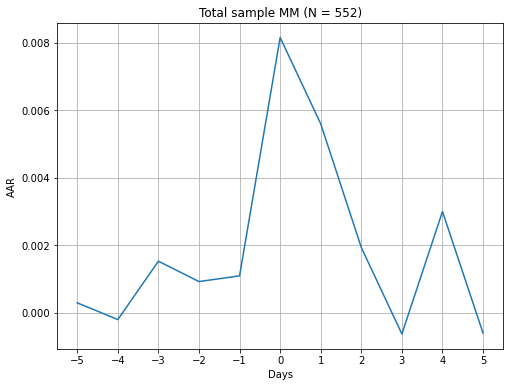

In [122]:
plot_AAR = final_results.mean()

plt.figure(figsize=(8, 6))
plot_AAR.plot()
plt.xticks(np.arange(-5,6,1))

plt.title('Total sample MM' + ' (N = ' + str(final_results.shape[0]) + ')')
plt.xlabel('Days')
plt.ylabel('AAR')
plt.grid(True)
plt.show()


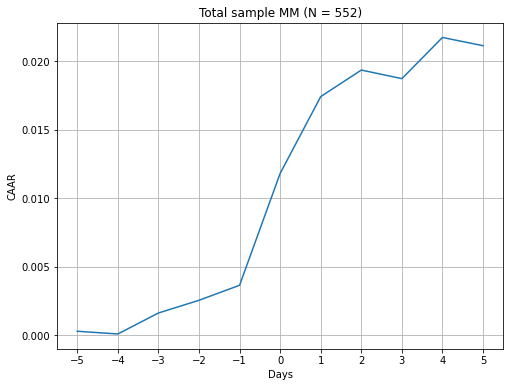

In [123]:


plot_AAR = final_results.mean().cumsum()

plt.figure(figsize=(8, 6))
plot_AAR.plot()
plt.xticks(np.arange(-5,6,1))

plt.title('Total sample MM' + ' (N = ' + str(final_results.shape[0]) + ')')
plt.xlabel('Days')
plt.ylabel('CAAR')

plt.grid(True)
plt.show()

In [124]:
calc_tstat(final_results.dropna())

-5 : 5 t-stat
0.021110836125627086 : 2.431641500669596
-2 : 2 t-stat
0.01771019928346865 : 2.7682139599732167
-1 : 1 t-stat
0.01484948770287782 : 2.937272983597296


In [125]:
resultsUK = final_results[final_results.index.isin(dates[dates['Acquiror country'] == 'United Kingdom']['Acquiror ticker symbol'])]
resultsNotUK = final_results[final_results.index.isin(dates[dates['Acquiror country'] != 'United Kingdom']['Acquiror ticker symbol'])]

In [126]:
# T-Stat Results UK MAM
calc_tstat(resultsUK.dropna())

-5 : 5 t-stat
0.019282874709239242 : 2.798556390941625
-2 : 2 t-stat
0.01598081641236215 : 3.1639364356959225
-1 : 1 t-stat
0.012722571734219288 : 3.161671040215982


In [127]:
# T-Stat Results not UK MAM
calc_tstat(resultsNotUK.dropna())

-5 : 5 t-stat
0.0234389162397539 : 1.9079869728629415
-2 : 2 t-stat
0.019772446144457542 : 2.3652565679967723
-1 : 1 t-stat
0.017529141712217155 : 2.669541371578947


In [128]:
def calc_positive_ratio(results):
    for n in [[-5,5], [-2,2], [-1,1]]:
        print(str(n) + " : " + str(round((results.loc[:,n[0]:n[1]].sum(axis=1)>0).value_counts(normalize=True)[True]*100, 1))+ "%")


In [129]:
calc_positive_ratio(final_results.dropna())

[-5, 5] : 57.8%
[-2, 2] : 62.3%
[-1, 1] : 61.2%


In [130]:
cars_5_df = pd.DataFrame(final_results.loc[:, -2:2].sum(axis=1)).reset_index()
cars_5_df.columns = ['Acquiror ticker symbol', 'CAR5d']

In [131]:
dates_car5 = dates.merge(cars_5_df, on="Acquiror ticker symbol", how='right')

In [132]:
dates_car5 = dates_car5.drop_duplicates(subset='CAR5d')

In [133]:
wo_liablities = dates_car5[~dates_car5['Deal method of payment'].str.contains('Liabilities')]
wo_liablities = wo_liablities[~wo_liablities['Deal method of payment'].str.contains('Bonds')]
wo_liablities = wo_liablities[~wo_liablities['Deal method of payment'].str.contains('Business assets')]
wo_liablities = wo_liablities.replace('Cash Reserves\nCash', 'Cash', regex=True)
wo_liablities = wo_liablities.replace('Cash\nCash Reserves', 'Cash', regex=True)
wo_liablities = wo_liablities.replace('Cash assumed\nCash', 'Cash', regex=True)
wo_liablities = wo_liablities.replace('Cash\nCash assumed', 'Cash', regex=True)


# wo_liablities[(wo_liablities['Deal method of payment'] != 'Cash') & (wo_liablities['Deal method of payment'] != ' Shares')]['Deal method of payment'] = 'Mixed'

wo_liablities.loc[~wo_liablities['Deal method of payment'].isin(['Cash', 'Shares']), 'Deal method of payment'] = 'Mixed'

wo_liablities.rename(columns={'Deal method of payment': 'Method'}, inplace=True)
wo_liablities['Method'].value_counts()

Cash      263
Mixed     146
Shares     57
Name: Method, dtype: int64

In [134]:
dates_car5 = wo_liablities

In [135]:
dates_car5

,Unnamed: 0,Deal Number,Acquiror name,Acquiror country code,Target name,Target country code,Deal type,Deal status,Deal value\nEUR,Acquiror country,...,Acquiror listed,Target listed,Acquiror main exchange,Method,Announced date,Pre-deal acquiror market capitalisation\nEUR,Pre-deal acquiror market capitalisation\nEUR.1,Initial stake (%),Final stake (%),CAR5d
0,1.0,1601409926,NEFTYANAYA KOMPANIYA ROSNEFT OAO,RU,TNK-BP LTD,VG,Acquisition increased from 50% to 100%,Completed,2.143986e+10,Russian Federation,...,Listed,Unlisted,Moscow Exchange MICEX - RTS,Cash,41255,7.168696e+10,7.168696e+10,50.00000,100.00000,0.029685
2,8.0,1909416474,SAFRAN SA,FR,ZODIAC AEROSPACE SA,FR,Acquisition 100%,Completed,7.081397e+09,France,...,Listed,Delisted,Euronext Paris,Mixed,43076,3.582701e+10,3.582701e+10,0.00000,100.00000,-0.013265
5,17.0,1941278844,FLUTTER ENTERTAINMENT PLC,IE,"STARS GROUP INC., THE",CA,Acquisition 100%,Completed,5.647174e+09,Ireland,...,Listed,Delisted,Euronext Dublin,Shares,43740,8.479820e+09,8.479820e+09,0.00000,100.00000,0.090320
7,20.0,1909535508,TESCO PLC,GB,BOOKER GROUP PLC,GB,Acquisition 100%,Completed,4.080113e+09,United Kingdom,...,Listed,Delisted,London Stock Exchange,Mixed,42762,1.881445e+10,1.881445e+10,0.00000,100.00000,-0.019905
8,26.0,1941172351,PHOENIX GROUP HOLDINGS PLC,GB,REASSURE GROUP PLC,GB,Acquisition 100%,Completed,3.532691e+09,United Kingdom,...,Listed,Unlisted,London Stock Exchange,Mixed,43805,5.965995e+09,5.965995e+09,0.00000,100.00000,-0.036811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,1461.0,1909614247,LAVIDE HOLDING NV,NL,GASTVRIJ NEDERLAND BV,NL,Acquisition 100%,Completed,1.450000e+05,Netherlands,...,Listed,Unlisted,Euronext Amsterdam,Cash,42941,2.440467e+06,2.440467e+06,0.00000,100.00000,-0.073070
958,1463.0,1909216685,TAVISTOCK INVESTMENTS PLC,GB,CORNERSTONE ASSET HOLDINGS LTD,GB,Acquisition 100%,Completed,1.380860e+05,United Kingdom,...,Listed,Unlisted,London Stock Exchange,Mixed,42095,1.029789e+07,1.029789e+07,0.00000,100.00000,-0.097870
959,1465.0,1601303406,AFRICAN CONSOLIDATED RESOURCES PLC,GB,AEROMAG.COM LTD,GB,Acquisition 100%,Completed,1.071201e+05,United Kingdom,...,Listed,Unlisted,London Stock Exchange,Shares,40809,3.105435e+07,3.105435e+07,0.00000,100.00000,-0.001822
960,1466.0,1601350301,AEOREMA COMMUNICATIONS PLC,GB,ST16 LTD,GB,Acquisition 100%,Completed,1.037141e+05,United Kingdom,...,Listed,Unlisted,London Stock Exchange,Mixed,40977,7.474569e+05,7.474569e+05,0.00000,100.00000,0.083980


In [136]:
dates_car5[dates_car5['Acquiror country']=='United Kingdom'].shape[0]

277

In [137]:
import statsmodels.formula.api as smf

In [138]:
dates_car5 = wo_liablities
dates_car5 = dates_car5.rename(columns={"Deal value\nEUR":"deal_value", 'Pre-deal acquiror market capitalisation\nEUR' : 'MarCap'})
dates_car5['RelDum'] = pd.get_dummies((dates_car5['Acquiror primary US SIC code'].str[:2]==dates_car5['Target primary US SIC code'].str[:2]))[True]
dates_car5['CrossDum'] = pd.get_dummies((dates_car5['Acquiror country code']!=dates_car5['Target country code']))[False]
dates_car5['Year'] = pd.to_datetime((dates_car5['Announced date'] - 25569) * 86400.0, unit='s').astype('str').str[:4]

dates_car5['Tlist'] = pd.get_dummies(dates_car5['Target listed'].str[:8].str.replace('Delisted', 'Listed'))['Listed']

dates_car5['MethodDummy'] = pd.get_dummies((dates_car5['Method']=='Cash'))[True]

dates_car5['LogDV'] = np.log(dates_car5['deal_value'])
dates_car5['RelSize'] = dates_car5['deal_value']/(dates_car5['MarCap'].replace('n.a', None, regex=True).astype('float64'))
dates_car5['MarCap'] = np.log(dates_car5['MarCap'])

dates_car5.rename(columns={'Acquiror country' : 'Acquiror_country'}, inplace=True)

results = smf.ols('CAR5d ~ C(Tlist)+C(RelDum)+C(CrossDum)+RelSize+Acquiror_country+C(MethodDummy)+C(Year) +MarCap + LogDV', data = dates_car5).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CAR5d   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.281
Date:                Sat, 25 Mar 2023   Prob (F-statistic):              0.137
Time:                        10:17:01   Log-Likelihood:                 595.91
No. Observations:                 437   AIC:                            -1120.
Df Residuals:                     401   BIC:                            -972.9
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.0224      0.043      0.527      0.598      -0.061       0.106
C(Tlist)[T.1]                             -0.0301      0.012     -2.587      0.010      -0.053      -0.007
C(RelDum)[T.1]                            -0.0002      0.007     -0.037      0.971      -0.013       0.013
C(CrossDum)[T.1]                          -0.0092      0.007     -1.318      0.188      -0.023       0.005
Acquiror_country[T.Croatia]                0.0254      0.069      0.367      0.714      -0.111       0.162
Acquiror_country[T.France]                 0.0148      0.026      0.566      0.572      -0.037       0.066
Acquiror_country[T.Germany]                0.0423      0.037      1.155      0.249      -0.030       0.114
Acquiror_country[T.Gibraltar]              0.0259      0.069      0.376      0.707      -0.110       0.161
Acquiror_country[T.Greece]                 0.0481      0.046      1.048      0.295      -0.042       0.138
Acquiror_country[T.Iceland]                0.0366      0.069      0.529      0.597      -0.099       0.172
Acquiror_country[T.Ireland]                0.0045      0.035      0.129      0.897      -0.064       0.073
Acquiror_country[T.Italy]                  0.0019      0.027      0.070      0.944      -0.052       0.056
Acquiror_country[T.Lithuania]             -0.0745      0.069     -1.085      0.279      -0.209       0.060
Acquiror_country[T.Luxembourg]             0.0270      0.069      0.390      0.697      -0.109       0.163
Acquiror_country[T.Netherlands]           -0.0113      0.028     -0.402      0.688      -0.066       0.044
Acquiror_country[T.Norway]                 0.0206      0.030      0.679      0.497      -0.039       0.080
Acquiror_country[T.Poland]                -0.0251      0.030     -0.840      0.402      -0.084       0.034
Acquiror_country[T.Russian Federation]     0.0122      0.035      0.348      0.728      -0.056       0.081
Acquiror_country[T.Spain]                 -0.0079      0.030     -0.266      0.790      -0.066       0.050
Acquiror_country[T.Sweden]                 0.0364      0.026      1.411      0.159      -0.014       0.087
Acquiror_country[T.Switzerland]            0.0177      0.044      0.401      0.688      -0.069       0.104
Acquiror_country[T.Turkey]                 0.0653      0.037      1.767      0.078      -0.007       0.138
Acquiror_country[T.United Kingdom]         0.0105      0.023      0.463      0.644      -0.034       0.055
C(MethodDummy)[T.1]                     5.537e-05      0.007      0.007      0.994      -0.014       0.015
C(Year)[T.2011]                            0.0096      0.016      0.598      0.550      -0.022       0.041
C(Year)[T.2012]                           -0.0032      0.017     -0.188      0.851     

In [139]:
dates_car5 = wo_liablities[wo_liablities['Acquiror country']!='United Kingdom']
dates_car5 = dates_car5.rename(columns={"Deal value\nEUR":"deal_value", 'Pre-deal acquiror market capitalisation\nEUR' : 'MarCap'})
dates_car5['RelDum'] = pd.get_dummies((dates_car5['Acquiror primary US SIC code'].str[:2]==dates_car5['Target primary US SIC code'].str[:2]))[True]
dates_car5['CrossDum'] = pd.get_dummies((dates_car5['Acquiror country code']!=dates_car5['Target country code']))[False]
dates_car5['Year'] = pd.to_datetime((dates_car5['Announced date'] - 25569) * 86400.0, unit='s').astype('str').str[:4]

dates_car5['Tlist'] = pd.get_dummies(dates_car5['Target listed'].str[:8].str.replace('Delisted', 'Listed'))['Listed']

dates_car5['MethodDummy'] = pd.get_dummies((dates_car5['Method']=='Cash'))[True]

dates_car5['LogDV'] = np.log(dates_car5['deal_value'])
dates_car5['RelSize'] = dates_car5['deal_value']/(dates_car5['MarCap'].replace('n.a', None, regex=True).astype('float64'))
dates_car5['MarCap'] = np.log(dates_car5['MarCap'])

dates_car5.rename(columns={'Acquiror country' : 'Acquiror_country'}, inplace=True)

results = smf.ols('CAR5d ~ C(Tlist)+C(RelDum)+C(CrossDum)+RelSize+Acquiror_country+C(MethodDummy)+C(Year) +MarCap + LogDV', data = dates_car5).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CAR5d   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.8455
Date:                Sat, 25 Mar 2023   Prob (F-statistic):              0.708
Time:                        10:17:01   Log-Likelihood:                 240.45
No. Observations:                 160   AIC:                            -410.9
Df Residuals:                     125   BIC:                            -303.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -0.0370      0.062     -0.594      0.553      -0.160       0.086
C(Tlist)[T.1]                             -0.0255      0.016     -1.585      0.116      -0.057       0.006
C(RelDum)[T.1]                             0.0065      0.011      0.581      0.562      -0.016       0.028
C(CrossDum)[T.1]                          -0.0113      0.012     -0.969      0.334      -0.034       0.012
Acquiror_country[T.Croatia]                0.0525      0.068      0.777      0.439      -0.081       0.186
Acquiror_country[T.France]                 0.0089      0.026      0.339      0.735      -0.043       0.061
Acquiror_country[T.Germany]                0.0366      0.036      1.029      0.306      -0.034       0.107
Acquiror_country[T.Gibraltar]              0.0120      0.067      0.179      0.858      -0.121       0.145
Acquiror_country[T.Greece]                 0.0441      0.048      0.910      0.365      -0.052       0.140
Acquiror_country[T.Iceland]                0.0291      0.067      0.434      0.665      -0.104       0.162
Acquiror_country[T.Ireland]               -0.0093      0.034     -0.274      0.785      -0.077       0.058
Acquiror_country[T.Italy]                  0.0032      0.027      0.119      0.906      -0.050       0.056
Acquiror_country[T.Lithuania]             -0.0619      0.066     -0.938      0.350      -0.192       0.069
Acquiror_country[T.Luxembourg]             0.0162      0.067      0.241      0.810      -0.117       0.149
Acquiror_country[T.Netherlands]           -0.0158      0.028     -0.565      0.573      -0.071       0.040
Acquiror_country[T.Norway]                 0.0153      0.030      0.510      0.611      -0.044       0.075
Acquiror_country[T.Poland]                -0.0149      0.030     -0.493      0.623      -0.075       0.045
Acquiror_country[T.Russian Federation]     0.0109      0.036      0.304      0.761      -0.060       0.082
Acquiror_country[T.Spain]                 -0.0072      0.030     -0.237      0.813      -0.067       0.053
Acquiror_country[T.Sweden]                 0.0415      0.026      1.584      0.116      -0.010       0.093
Acquiror_country[T.Switzerland]            0.0212      0.043      0.491      0.624      -0.064       0.107
Acquiror_country[T.Turkey]                 0.0722      0.037      1.973      0.051      -0.000       0.145
C(MethodDummy)[T.1]                       -0.0087      0.014     -0.634      0.527      -0.036       0.018
C(Year)[T.2011]                           -0.0097      0.039     -0.245      0.807      -0.088       0.068
C(Year)[T.2012]                           -0.0241      0.030     -0.800      0.425      -0.084       0.036
C(Year)[T.2013]                            0.0051      0.029      0.175      0.861     

In [140]:
dates_car5 = wo_liablities[wo_liablities['Acquiror country']=='United Kingdom']
dates_car5 = dates_car5.rename(columns={"Deal value\nEUR":"deal_value", 'Pre-deal acquiror market capitalisation\nEUR' : 'MarCap'})
dates_car5['RelDum'] = pd.get_dummies((dates_car5['Acquiror primary US SIC code'].str[:2]==dates_car5['Target primary US SIC code'].str[:2]))[True]
dates_car5['CrossDum'] = pd.get_dummies((dates_car5['Acquiror country code']!=dates_car5['Target country code']))[False]
dates_car5['Year'] = pd.to_datetime((dates_car5['Announced date'] - 25569) * 86400.0, unit='s').astype('str').str[:4]

dates_car5['Tlist'] = pd.get_dummies(dates_car5['Target listed'].str[:8].str.replace('Delisted', 'Listed'))['Listed']

dates_car5['MethodDummy'] = pd.get_dummies((dates_car5['Method']=='Cash'))[True]

dates_car5['LogDV'] = np.log(dates_car5['deal_value'])
dates_car5['RelSize'] = dates_car5['deal_value']/(dates_car5['MarCap'].replace('n.a', None, regex=True).astype('float64'))
dates_car5['MarCap'] = np.log(dates_car5['MarCap'])

dates_car5.rename(columns={'Acquiror country' : 'Acquiror_country'}, inplace=True)

results = smf.ols('CAR5d ~ C(Tlist)+C(RelDum)+C(CrossDum)+RelSize+Acquiror_country+C(MethodDummy)+C(Year) +MarCap + LogDV', data = dates_car5).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CAR5d   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2.899
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           0.000211
Time:                        10:17:02   Log-Likelihood:                 373.45
No. Observations:                 277   AIC:                            -712.9
Df Residuals:                     260   BIC:                            -651.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0104      0.048      0.217      0.828      -0.084       0.105
C(Tlist)[T.1]          -0.0377      0.017     -2.274      0.024      -0.070      -0.005
C(RelDum)[T.1]         -0.0011      0.008     -0.131      0.896      -0.018       0.015
C(CrossDum)[T.1]       -0.0082      0.009     -0.909      0.364      -0.026       0.010
C(MethodDummy)[T.1]     0.0056      0.009      0.616      0.539      -0.012       0.023
C(Year)[T.2011]         0.0173      0.018      0.975      0.331      -0.018       0.052
C(Year)[T.2012]         0.0103      0.021      0.497      0.620      -0.031       0.051
C(Year)[T.2013]         0.0157      0.018      0.888      0.376      -0.019       0.050
C(Year)[T.2014]        -0.0008      0.017     -0.049      0.961      -0.034       0.032
C(Year)[T.2015]         0.0292      0.017      1.700      0.090      -0.005       0.063
C(Year)[T.2016]         0.0610      0.018      3.359      0.001       0.025       0.097
C(Year)[T.2017]         0.0135      0.017      0.781      0.436      -0.021       0.047
C(Year)[T.2018]         0.0150      0.018      0.842      0.400      -0.020       0.050
C(Year)[T.2019]         0.0061      0.017      0.368      0.713      -0.027       0.039
RelSize                 0.0374      0.009      4.303      0.000       0.020       0.055
MarCap                  0.0025      0.004      0.637      0.525      -0.005       0.010
LogDV                  -0.0036      0.004     -0.949      0.344      -0.011       0.004
==============================================================================
Omnibus:                      163.553   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2649.088
Skew:                           2.012   Prob(JB):                         0.00
Kurtosis:                      17.606   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
results = smf.ols('CAR5d ~ C(Tlist)+ MarCap + LogDV', data = dates_car5).fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.022    
Dependent Variable: CAR5d            AIC:                -702.6217
Date:               2023-03-25 10:17 BIC:                -688.1256
No. Observations:   277              Log-Likelihood:     355.31   
Df Model:           3                F-statistic:        3.074    
Df Residuals:       273              Prob (F-statistic): 0.0282   
R-squared:          0.033            Scale:              0.0045677
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       0.0528    0.0396   1.3338  0.1834  -0.0251   0.1307
C(Tlist)[T.1]  -0.0392    0.0167  -2.3478  0.0196  -0.0721  -0.0063
MarCap         -0.0064    0.0031  -2.0435  0.0420  -0.0125  -0.0002
LogDV           0.0053    0.0034   1.5801  0.1152  -0.0013   0.0120
------------------------------------------------------------------
Omnibus:              225.753      Durbin-Watson:         2.159   
Prob(Omnibus):        0.000        Jarque-Bera (JB):      5735.604
Skew:                 3.030        Prob(JB):              0.000   
Kurtosis:             24.453       Condition No.:         254     
==================================================================

"""

In [142]:
wo_liablities['Acquiror country'].value_counts()

United Kingdom        277
Sweden                 27
France                 24
Italy                  16
Netherlands            15
Poland                 13
Spain                  12
Norway                 10
Belgium                 9
Russian Federation      7
Ireland                 6
Germany                 5
Turkey                  5
Switzerland             3
Greece                  3
Gibraltar               1
Croatia                 1
Luxembourg              1
Lithuania               1
Iceland                 1
Name: Acquiror country, dtype: int64

In [143]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [144]:
pairwise = pairwise_tukeyhsd(dates_car5['CAR5d'], dates_car5['Year'])
pairwise.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
2010,2011,0.0183,0.9919,-0.04,0.0766,False
2010,2012,0.0069,1.0,-0.0617,0.0756,False
2010,2013,0.0158,0.9971,-0.0419,0.0736,False
2010,2014,0.0127,0.9993,-0.0427,0.068,False
2010,2015,0.0319,0.7104,-0.0235,0.0872,False
2010,2016,0.0606,0.0423,0.001,0.1202,True
2010,2017,0.0118,0.9996,-0.0439,0.0676,False
2010,2018,0.0142,0.9989,-0.0447,0.0731,False
2010,2019,0.0073,1.0,-0.0465,0.0612,False
2011,2012,-0.0114,1.0,-0.0814,0.0586,False


In [145]:
dates_car5['Deal method of payment'].unique()
dates_car5['Deal method of payment'].isin()

KeyError: 'Deal method of payment'

Cash      509
Mixed     190
Shares     65
Name: Deal method of payment, dtype: int64

In [ ]:
pairwise.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.0147,0.0204,-0.0271,-0.0023,True


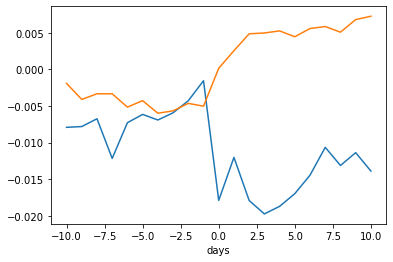

In [ ]:
##MM TListed 
listedT = dates_car5.set_index('Acquiror ticker symbol')
listedT_1 = listedT[listedT['Tlist']==1].index
listedT_0 = listedT[listedT['Tlist']==0].index
final_results[final_results.index.isin(listedT_1)].mean().cumsum().plot()
final_results[final_results.index.isin(listedT_0)].mean().cumsum().plot()
plt.show()

In [ ]:
round(dates_car5[['Tlist','RelDum','CrossDum','RelSize','CAR5d']].corr(),2)

,Tlist,RelDum,CrossDum,RelSize,CAR5d
Tlist,1.00,0.09,-0.04,-0.00,-0.08
RelDum,0.09,1.00,0.02,-0.07,-0.00
CrossDum,-0.04,0.02,1.00,-0.02,0.04
RelSize,-0.00,-0.07,-0.02,1.00,0.02
CAR5d,-0.08,-0.00,0.04,0.02,1.00


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
X = dates_car5[['Tlist','RelDum','CrossDum','RelSize','CAR5d']]
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

    feature       VIF
0     Tlist  1.115690
1    RelDum  1.492457
2  CrossDum  1.577909
3   RelSize  1.219901
4     CAR5d  1.132808


In [ ]:
dates_car5['MarCap'].replace('n.a', None, regex=True).astype('float64')

0       7.168696e+10
1       4.790845e+10
2                NaN
3                NaN
4                NaN
            ...     
3384    3.105435e+07
3385    7.474569e+05
3386    5.256269e+06
3387             NaN
3388    4.467512e+07
Name: MarCap, Length: 3389, dtype: float64

In [ ]:
dates_car5['Target listed'].value_counts()

Unlisted                                                      2263
Unlisted\nUnlisted                                             150
Delisted                                                       115
Unlisted\nUnlisted\nUnlisted                                     9
Unlisted\nUnlisted\nUnlisted\nUnlisted\nUnlisted                 7
Unlisted\nUnlisted\nUnlisted\nUnlisted\nUnlisted\nUnlisted       3
Unlisted\nUnlisted\nUnlisted\nUnlisted                           2
Name: Target listed, dtype: int64

In [ ]:
profile = dates_car5.profile_report()

In [ ]:
profile